In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
sns.set_theme() # this line activates a signature aesthetic that makes seaborn plots look better

In [2]:
### Declaring known value sets ### 

#Empty Columns & Non Valueble columns 
    #(Dropping health concerns because all entries are yes)
emptyColumns = ['Unnamed: 42', 'Unnamed: 43','Health Concerns?'] 

#Location Columns
locationColumns = ['City','State']

#Syptom Columns (Columns that need to be one-hot encoded)
symptomColumns = ['Diagnoses', 
                'Eyes, Ears, Nose, & Throat',
                'Resipiratory', 'Digestive',
                'Circulatory', 
                'Skin', 
                'Brain', 
                'Nervous', 
                'Urinary', 
                'Immune', 
                'Reproductive']

#Health Information 
healthInfoColumns = [
        'Sum of the Logs (Group I)',
        'Sum of the Logs (Group II)',
        'ERMI Score (Group I - Group II)']

#Molds 
moldColumns = ['Aspergillus flavus/oryzae',
       'Aspergillus fumigatus', 'Aspergillus niger', 'Aspergillus ochraceus',
       'Aspergillus penicillioides', 'Aspergillus restrictus*',
       'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis',
       'Aspergillus versicolor', 'Aureobasidium pullulans',
       'Chaetomium globosum', 'Cladosporium sphaerospermum',
       'Eurotium (Asp.) amstelodami*', 'Paecilomyces variotii',
       'Penicillium brevicompactum', 'Penicillium corylophilum',
       'Penicillium crustosum*', 'Penicillium purpurogenum',
       'Penicillium spinulosum*', 'Penicillium variabile',
       'Scopulariopsis brevicaulis/fusca', 'Scopulariopsis chartarum',
       'Stachybotrys chartarum', 'Trichoderma viride*', 'Wallemia sebi','Acremonium strictum',
       'Alternaria alternata', 'Aspergillus ustus',
       'Cladosporium cladosporioides 1', 'Cladosporium cladosporioides 2',
       'Cladosporium herbarum', 'Epicoccum nigrum', 'Mucor amphibiorum*',
       'Penicillium chrysogenum', 'Rhizopus stolonifer']

In [3]:
df = pd.read_csv('cleanedData.csv')

brain_columns = [col for col in df.columns if 'Brain' in col]
df_brain = df[brain_columns]
print(df_brain.columns)

nervous_columns = [col for col in df.columns if 'Nervous' in col]
df_nervous = df[nervous_columns]
print(df_nervous.columns)


df_mold = df[moldColumns]
print(df_mold.columns)
#sns.pairplot(data=test)

df_states = df[[col for col in df.columns if 'State' in col]]
print(df_states.columns)

df_cities = df[[col for col in df.columns if 'City' in col]]
print(df_states.columns)

Index(['Brain_brainfog', 'Brain_memoryloss', 'Brain_anger/aggressiveness',
       'Brain_confusion', 'Brain_troublefindingtherightword'],
      dtype='object')
Index(['Nervous_anxiousness', 'Nervous_fatigue', 'Nervous_depression',
       'Nervous_headache', 'Nervous_migraine', 'Nervous_insomnia',
       'Nervous_neuropathies', 'Nervous_seizures', 'Nervous_dizziness/vertigo',
       'Nervous_incoordination', 'Nervous_tremors', 'Nervous_slowreflexes',
       'Nervous_dysautonomia', 'Nervous_difficultywithbalanceandwalking'],
      dtype='object')
Index(['Aspergillus flavus/oryzae', 'Aspergillus fumigatus',
       'Aspergillus niger', 'Aspergillus ochraceus',
       'Aspergillus penicillioides', 'Aspergillus restrictus*',
       'Aspergillus sclerotiorum', 'Aspergillus sydowii', 'Aspergillus unguis',
       'Aspergillus versicolor', 'Aureobasidium pullulans',
       'Chaetomium globosum', 'Cladosporium sphaerospermum',
       'Eurotium (Asp.) amstelodami*', 'Paecilomyces variotii',
      

Dont really know if the graph above is helpful, will do other exploratory things

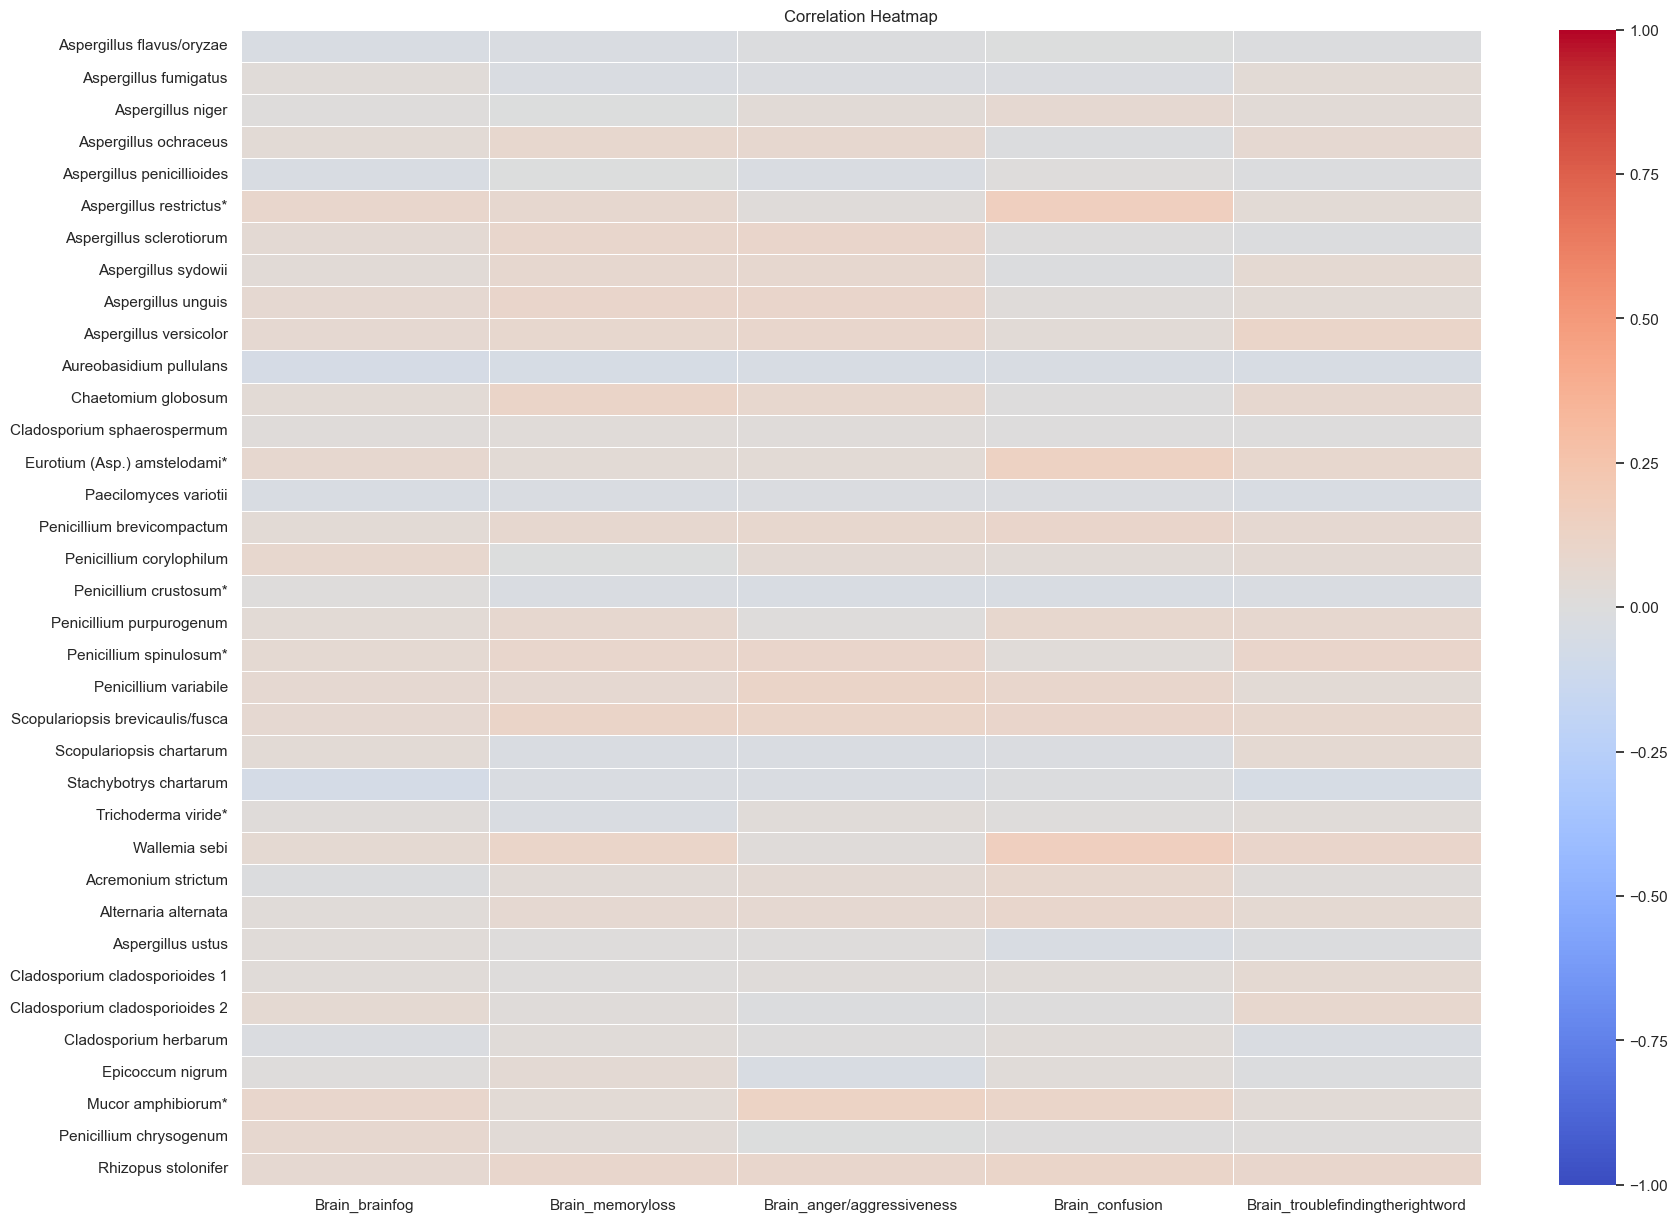

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


# Combine the filtered data
combined_data = pd.concat([df_brain, df_mold], axis=1)

# Compute the correlation matrix

# This Creates an empty dataframe where rows are molds and columns are symptoms
correlation_matrix = pd.DataFrame(index=moldColumns, columns=brain_columns)

# For every pairing of mold and a symptom, do a correlation calculation which is then stored in that cell of the matrix 
for mold in moldColumns:
    for symptom in brain_columns:
        correlation_matrix.loc[mold,symptom] = df[mold].corr(df[symptom])

correlation_matrix = correlation_matrix.astype(float)

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',linewidths=0.5, linecolor='white', vmin=-1, vmax=1)  # 'annot=False' to avoid cluttering with annotations
plt.title('Correlation Heatmap')
plt.show()


So from the looks of this graphed corrilated matrix, there are some associations. 
Some notable ones are that some molds seems to have higher values 

The information we want are the mold vs symptom corrilations, all of which look very light in color
hard to immediately draw information from this graph 

From the values shown below and what ive learned:
Positive values mean as one increases the likelyhood of the other being positive increases. 
Negative values mean when one increases the other tends to decrease 

According to these values, most corrilations are pretty low. 

But lets find out more 

In [5]:
correlation_matrix.head(10)

,Brain_brainfog,Brain_memoryloss,Brain_anger/aggressiveness,Brain_confusion,Brain_troublefindingtherightword
Aspergillus flavus/oryzae,-0.032400,-0.027999,-0.015378,-0.001465,-0.009516
Aspergillus fumigatus,0.028755,-0.030645,-0.019044,-0.022181,0.044786
Aspergillus niger,0.011339,-0.005872,0.036544,0.066711,0.036730
Aspergillus ochraceus,0.043058,0.082678,0.077721,-0.009571,0.064736
Aspergillus penicillioides,-0.032927,-0.002700,-0.029870,0.010969,-0.011079
Aspergillus restrictus*,0.093274,0.074092,0.020794,0.156424,0.040031
Aspergillus sclerotiorum,0.047607,0.091528,0.098950,0.005000,-0.011665
Aspergillus sydowii,0.038934,0.075117,0.074915,-0.012677,0.059252
Aspergillus unguis,0.069030,0.097026,0.100859,0.019456,0.043155
Aspergillus versicolor,0.069296,0.083205,0.088490,0.032891,0.107344


In [6]:
correlation_matrix.describe()

,Brain_brainfog,Brain_memoryloss,Brain_anger/aggressiveness,Brain_confusion,Brain_troublefindingtherightword
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.032335,0.036950,0.034832,0.036349,0.035053
std,0.041743,0.049156,0.050047,0.055537,0.044074
min,-0.067948,-0.048671,-0.040771,-0.035213,-0.047788
25%,0.013360,-0.005392,-0.010546,-0.003202,-0.009236
50%,0.042116,0.037065,0.023521,0.022747,0.042587
75%,0.063283,0.077007,0.081846,0.086272,0.069262
max,0.093274,0.114667,0.125847,0.159845,0.107344


Yea, everything is under 0.126

I looked into things like not calculating 0's but research says thats not a good way to go since 0s do mean something here

Repeating Whole Process for Nervous System

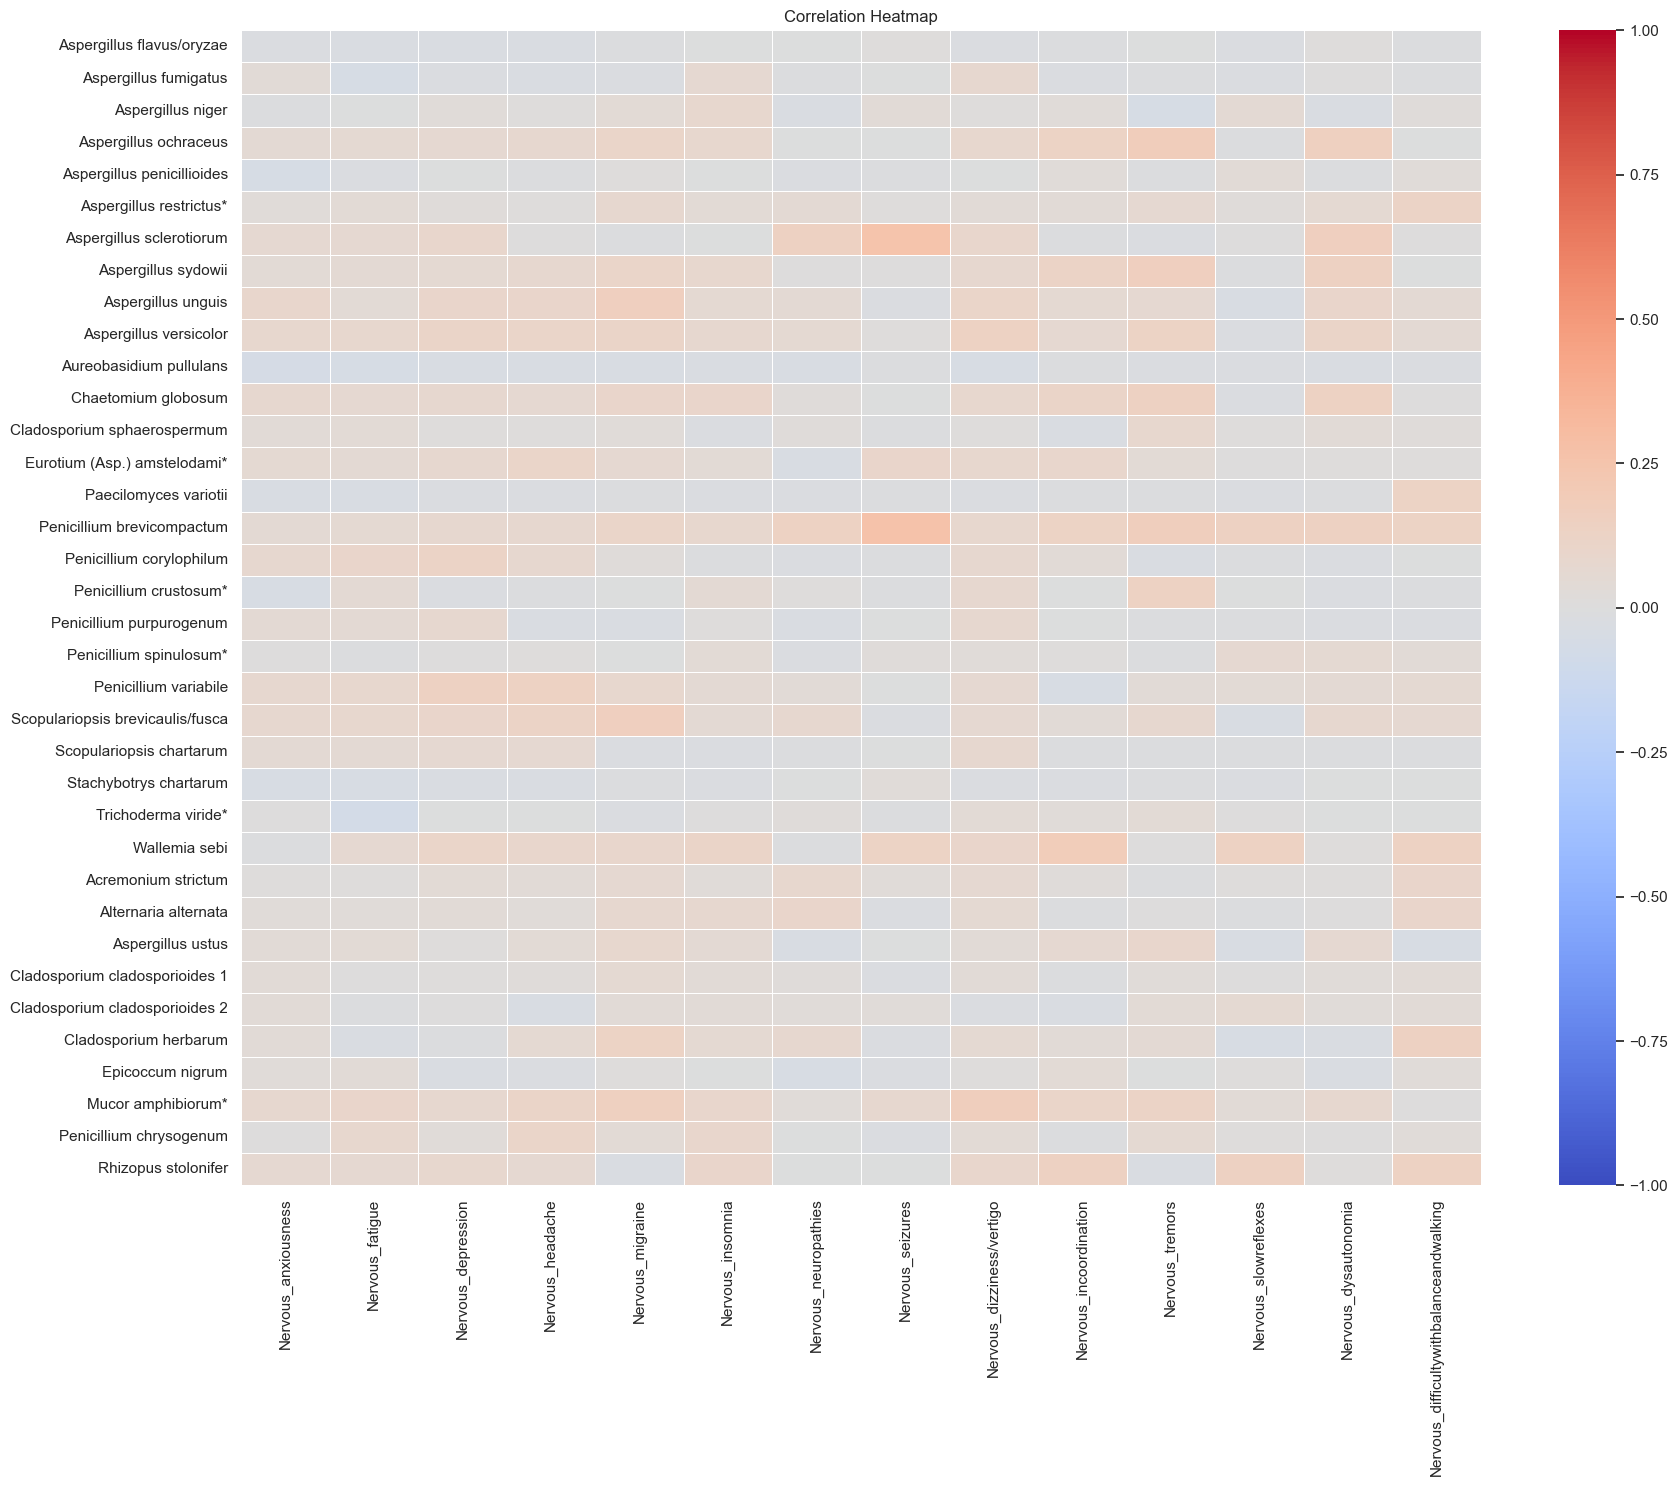

In [7]:
# Combine the filtered data
combined_data = pd.concat([df_nervous, df_mold], axis=1)

# Compute the correlation matrix

# This Creates an empty dataframe where rows are molds and columns are symptoms
correlation_matrix = pd.DataFrame(index=moldColumns, columns=nervous_columns)

# For every pairing of mold and a symptom, do a correlation calculation which is then stored in that cell of the matrix 
for mold in moldColumns:
    for symptom in nervous_columns:
        correlation_matrix.loc[mold,symptom] = df[mold].corr(df[symptom])

correlation_matrix = correlation_matrix.astype(float)

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm',linewidths=0.5, linecolor='white', vmin=-1, vmax=1)  # 'annot=False' to avoid cluttering with annotations
plt.title('Correlation Heatmap')
plt.show()

In [8]:
correlation_matrix.head(10)

,Nervous_anxiousness,Nervous_fatigue,Nervous_depression,Nervous_headache,Nervous_migraine,Nervous_insomnia,Nervous_neuropathies,Nervous_seizures,Nervous_dizziness/vertigo,Nervous_incoordination,Nervous_tremors,Nervous_slowreflexes,Nervous_dysautonomia,Nervous_difficultywithbalanceandwalking
Aspergillus flavus/oryzae,-0.021811,-0.024742,-0.025769,-0.026648,-0.009982,-0.000886,-0.003778,0.009127,-0.022907,-0.011563,-0.007575,-0.016659,0.008556,-0.013639
Aspergillus fumigatus,0.036913,-0.048350,-0.023064,-0.024526,-0.021903,0.064800,-0.010764,-0.007423,0.072250,-0.021622,-0.015366,-0.018480,0.004313,-0.012787
Aspergillus niger,-0.013325,-0.002045,0.024920,0.008715,0.044779,0.078908,-0.026034,0.032310,0.008119,0.023663,-0.048041,0.051973,-0.030567,0.021731
Aspergillus ochraceus,0.047970,0.055661,0.070208,0.070972,0.106000,0.081276,-0.004728,-0.006814,0.078329,0.130846,0.172513,-0.010695,0.151981,-0.004457
Aspergillus penicillioides,-0.052457,-0.020922,-0.004995,-0.008087,0.010248,-0.000412,-0.017232,-0.010332,-0.004015,0.027117,-0.014697,0.032913,-0.014271,0.028637
Aspergillus restrictus*,0.025619,0.039251,0.018080,0.014436,0.072642,0.042718,0.052220,0.008067,0.033257,0.032496,0.070157,0.019932,0.059067,0.121523
Aspergillus sclerotiorum,0.064799,0.063210,0.088827,0.003551,-0.008891,-0.001906,0.145002,0.255778,0.089845,-0.013128,-0.019659,0.002075,0.162760,0.005612
Aspergillus sydowii,0.044556,0.052404,0.062148,0.073588,0.102544,0.085630,0.000438,0.002152,0.072862,0.123200,0.161747,-0.011223,0.144743,-0.001577
Aspergillus unguis,0.092334,0.041669,0.094955,0.101030,0.163325,0.062203,0.052795,-0.021859,0.103796,0.061703,0.065921,-0.036252,0.096379,0.053260
Aspergillus versicolor,0.079256,0.080592,0.115419,0.107814,0.112410,0.078058,0.057470,0.008037,0.136895,0.064566,0.127679,-0.018673,0.109724,0.051228


In [9]:
correlation_matrix.describe()

,Nervous_anxiousness,Nervous_fatigue,Nervous_depression,Nervous_headache,Nervous_migraine,Nervous_insomnia,Nervous_neuropathies,Nervous_seizures,Nervous_dizziness/vertigo,Nervous_incoordination,Nervous_tremors,Nervous_slowreflexes,Nervous_dysautonomia,Nervous_difficultywithbalanceandwalking
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.028365,0.029007,0.039633,0.038421,0.047573,0.040744,0.017333,0.019635,0.051913,0.034913,0.040875,0.011754,0.035493,0.037278
std,0.041005,0.046727,0.050544,0.052110,0.058914,0.041242,0.047014,0.067147,0.046599,0.058291,0.063632,0.047449,0.058430,0.053748
min,-0.055104,-0.073176,-0.037379,-0.038258,-0.032092,-0.027079,-0.044552,-0.023159,-0.043442,-0.042616,-0.048041,-0.041781,-0.030567,-0.039831
25%,0.004564,-0.011063,-0.001624,-0.008512,-0.009164,-0.000530,-0.016149,-0.012598,0.025402,-0.011701,-0.011184,-0.017349,-0.009452,-0.005121
50%,0.036485,0.041119,0.031604,0.034421,0.042031,0.045299,-0.000103,-0.006772,0.064839,0.023779,0.030701,-0.001061,0.008812,0.025952
75%,0.060501,0.063014,0.076440,0.074490,0.094853,0.078238,0.039645,0.020894,0.078674,0.064086,0.074033,0.023129,0.068203,0.057320
max,0.092334,0.099291,0.145816,0.135016,0.163325,0.112158,0.145002,0.259129,0.168071,0.185473,0.172513,0.143778,0.162760,0.146527
